Populating the interactive namespace from numpy and matplotlib


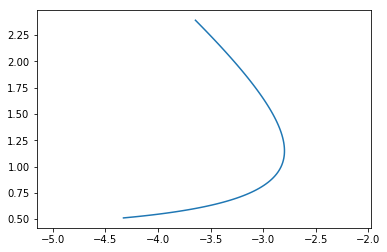

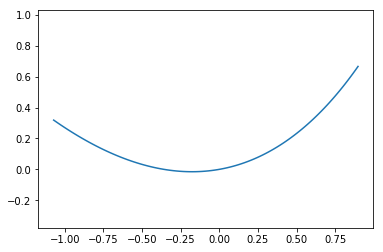

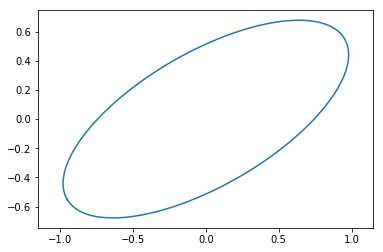

In [1]:
%pylab inline
import numpy as np

def rotMatrix(theta):
    A = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    return A

def Hyperbola(a, c, x0, x1, N=100, rot=0.0):
    b = np.sqrt(c**2 - a**2)
    x = np.linspace(x0, x1, N, endpoint=True)
    y = b**2*np.sqrt(1 + x**2/a**2)
    xy = np.stack([x, y], axis=0)
    A = rotMatrix(rot)
    xpyp = A.dot(xy)
    xp, yp = xpyp[0], xpyp[1]
    return xp, yp

def Parabola(f, x0, x1, N=100, rot=0.0):
    x = np.linspace(x0, x1, N, endpoint=True)
    y = x**2/(4.0*f)
    xy = np.stack([x, y], axis=0)
    A = rotMatrix(rot)
    xpyp = A.dot(xy)
    xp, yp = xpyp[0], xpyp[1]
    return xp, yp

def Ellipse(a, c, x0, x1, N=100, rot=0.0, branch='+'):
    assert branch in ['+', '-', '+-']
    assert a>=c
    b = np.sqrt(a**2 - c**2)
    if x0<-a:
        x0 = -a
    if x1>a:
        x1 = a
    x = np.linspace(x0, x1, N, endpoint=True)
    y = (b/a)*np.sqrt(a**2 - x**2)
    if branch=='-':
        y *= -1
    elif branch=='+-':
        y2 = -y
        x = np.concatenate((x, np.flip(x, 0)))
        y = np.concatenate((y, np.flip(y2, 0)))
    x = x[np.logical_not(np.isnan(y))]
    y = y[np.logical_not(np.isnan(y))]
    xy = np.stack([x, y], axis=0)
    A = rotMatrix(rot)
    xpyp = A.dot(xy)
    xp, yp = xpyp[0], xpyp[1]
    return xp, yp



a, c = 1.0, 2.0
x, y = Hyperbola(a, c, x0=-1, x1=1, N=100, rot=70/180*np.pi)
plot(x, y)
axis('equal')
show()

f = 0.5
x, y = Parabola(f, x0=-1, x1=1, N=100, rot=10/180*np.pi)
plot(x, y)
axis('equal')
show()

a, c = 1.1, 1.0
x, y = Ellipse(a, c, x0=-5, x1=5, N=1000, rot=30/180*np.pi, branch='+-')
plot(x, y)
axis('equal')
show()
